## <font color='green'> Application of the Logit model (logistic regression) to Default Data

In [2]:
import os
os.chdir('')

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

raw0 = pd.read_csv('Default.csv')

# drop the observations that contain missing values
raw0.dropna()

raw0.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


### <font color='green'> 1) Produce descriptive statistics and visualize data

#### <font color='green'> i) .describe()
* panda .describe(): https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [3]:
# Not enough data for a default of yes
raw0.describe(include = 'all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


#### <font color='green'> ii) crosstab
* Crosstab: https://pbpython.com/pandas-crosstab.html
    - pd.crosstab(A,B): produce a frequency table with the groups in A on the rows and groups in B on the columns

In [4]:
pd.crosstab(raw0.student,raw0.default)

default_notstudent = (206/(6850+206))
default_student = (127/(127+2817))

print(default_notstudent)
print(default_student)

0.02919501133786848
0.043138586956521736


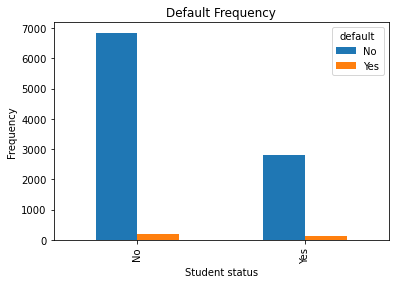

In [5]:
pd.crosstab(raw0.student,raw0.default).plot(kind='bar')

plt.title('Default Frequency')
plt.xlabel('Student status')
plt.ylabel('Frequency')
plt.show()

#### <font color='green'> iii) Histogram
* Histogram: https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html

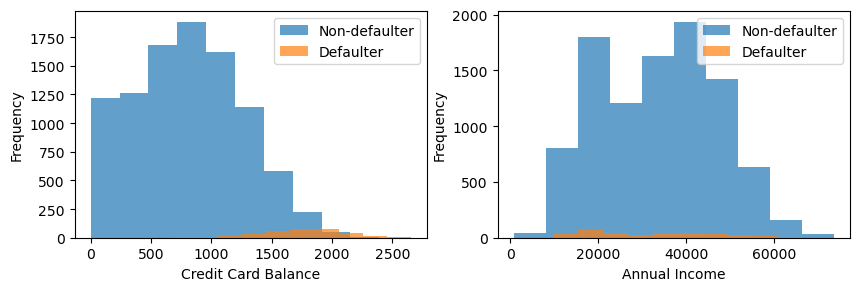

In [6]:
plt.figure(figsize=(10, 3), dpi=100)

#subplot - number of plots and location
plt.subplot(1, 2, 1)
plt.hist(raw0.balance.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.balance.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Credit Card Balance')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(raw0.income.loc[raw0.default == 'No'],label='Non-defaulter',alpha=0.7) 
plt.hist(raw0.income.loc[raw0.default == 'Yes'],label='Defaulter',alpha=0.7) 
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.legend()

plt.show()

#### <font color='green'> iv) Boxplot
* boxplot: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

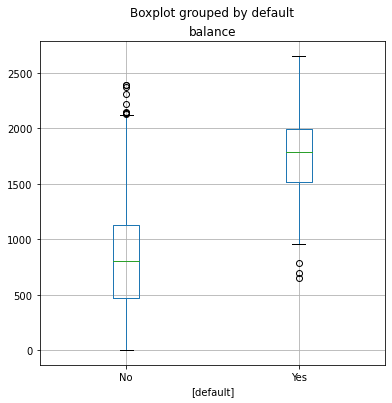

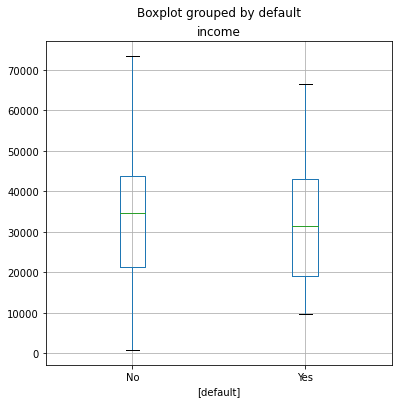

In [7]:
# by default breaks it into categories
# balance will most probably be useful

boxplot = raw0.boxplot(column='balance', by=['default'], figsize=(6,6))
boxplot = raw0.boxplot(column='income', by=['default'], figsize=(6,6))

### <font color='green'> 2) Run a logistic regression on the default data

* Two packages to run a logistic regression
    - statsmodels: ***.Logit
    - sklearn.linear_model: LogisticRegression

In [8]:
# create dummies
raw0.default=pd.get_dummies(raw0.default,drop_first=True) # default = 1
raw0.student=pd.get_dummies(raw0.student,drop_first=True) # student = 1

In [9]:
# Run a logistic regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

Y = raw0.default
X = raw0.iloc[:,2:]
X = sm.add_constant(X)

logitres=sm.Logit(Y,X).fit() # plug in Y first; case sensitive: Logit (o) logit(x)

print(logitres.summary2())

## interpretation is contrary to what we observed before - probability/ likelihood is negative

Optimization terminated successfully.
         Current function value: inf
         Iterations 10
                       Results: Logit
Model:              Logit            Pseudo R-squared: inf   
Dependent Variable: default          AIC:              inf   
Date:               2022-03-10 15:20 BIC:              inf   
No. Observations:   10000            Log-Likelihood:   -inf  
Df Model:           3                LL-Null:          0.0000
Df Residuals:       9996             LLR p-value:      1.0000
Converged:          1.0000           Scale:            1.0000
No. Iterations:     10.0000                                  
-------------------------------------------------------------
            Coef.   Std.Err.    z     P>|z|   [0.025   0.975]
-------------------------------------------------------------
const      -10.8690   0.4923 -22.0793 0.0000 -11.8339 -9.9042
student     -0.6468   0.2363  -2.7376 0.0062  -1.1098 -0.1837
balance      0.0057   0.0002  24.7365 0.0000   0.0053  0.0

C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\kgame\anaconda3\lib\site-packages\statsmodels\base\model.py:547: Hess

In [10]:
# logistic regression with interaction and higer order

logitres2=smf.logit('default ~ student + income + balance + student*balance + student*income + np.power(income,2) + np.power(balance,2)', data=raw0).fit() # logit (o), Logit(x)

print(logitres2.summary2())

Optimization terminated successfully.
         Current function value: 0.078496
         Iterations 12
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.462      
Dependent Variable:  default           AIC:               1585.9225  
Date:                2022-03-10 15:20  BIC:               1643.6052  
No. Observations:    10000             Log-Likelihood:    -784.96    
Df Model:            7                 LL-Null:           -1460.3    
Df Residuals:        9992              LLR p-value:       1.7668e-287
Converged:           1.0000            Scale:             1.0000     
No. Iterations:      12.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
---------------------------------------------------------------------
Intercept            -9.9217   1.5375 -6.4530 0.0000 -12.9352 -6.9082
student        

### <font color='green'> 3) Calculate/show default probability for students and non-students, separately, as a function of balance, holding income at its mean

* see the lecture note 6, page 6-7 (or textbook chapter 4.3)

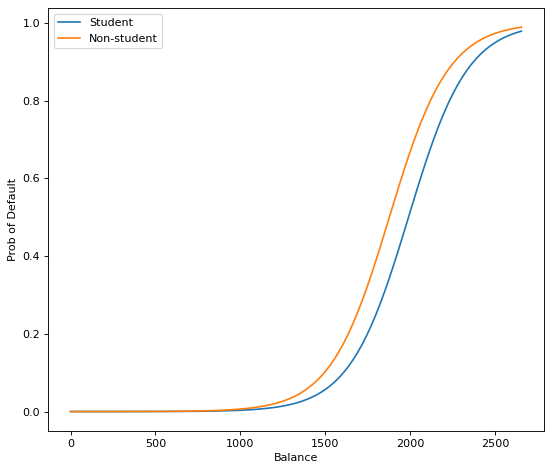

In [11]:
# Include result from logitres
# Predict the probability for a row of covariates
# Reshape from row vector to column vector
grid0 = np.linspace(raw0.balance.min(), raw0.balance.max(), 100).reshape((100,1))
xx1 = np.concatenate((np.ones((100,1)),np.ones((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
xx2 = np.concatenate((np.ones((100,1)),np.zeros((100,1)),grid0,np.ones((100,1))*raw0.income.mean()), axis=1)
prd1 = logitres.predict(xx1)
prd2 = logitres.predict(xx2)



plt.figure(figsize=(8, 7), dpi=80)
plt.plot(grid0,prd1,label='Student')
plt.plot(grid0,prd2,label='Non-student')
plt.xlabel('Balance')
plt.ylabel('Prob of Default')
plt.legend()
plt.show()

### <font color='green'> 4) Calculate marginal effect of a variable on default probability

* For the calculation of marginal effect of a continuous variable (e.g. balance or income) on default probability, 
    
    1. you can use the formula (1) on page 6 of the lecture note 6. 
    2. Or you can use ".get_margeff( )" function in statsmodels 
     * see: https://towardsdatascience.com/binary-logistic-regression-using-python-research-oriented-modelling-and-interpretation-49b025f1b510 and https://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.DiscreteResults.get_margeff.html
     * However, remember that the five different types of the marginal effects calculated from the ".get_margeff( )" doesn't include the marginal effect computed by the formula (1).

In [12]:
# mean is the marginal effect at the mean of each regressor
## HAVE TO DO ME to GET IMPACT ON PROBABLITY
meff=logitres.get_margeff(at = 'mean', method = 'dydx', dummy = True)
print(meff.summary())

        Logit Marginal Effects       
Dep. Variable:                default
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
student       -0.0012      0.000     -2.794      0.005      -0.002      -0.000
balance       1.2e-05   1.83e-06      6.568      0.000    8.42e-06    1.56e-05
income      6.345e-09   1.72e-08      0.369      0.712   -2.74e-08    4.01e-08


### <font color='darkred'> HW6: Calculate the marginal effect of the student status on default probability, holding income and balance at their means, using the formula (2) on page 7 of the lecture note 6 

* Note that the student variable is binary - use .predict()

In [22]:
## Predict using predict function
xx3 = [1,1, raw0.balance.mean(), raw0.income.mean()]
xx4 = [1,0, raw0.balance.mean(), raw0.income.mean()]
prd3 = logitres.predict(xx3)
prd4 = logitres.predict(xx4)

print(prd3-prd4)

[-0.00120547]


In [21]:
## Predict using formula

expfunc = math.exp(-10.869+(-.6468*1)+(.0057*raw0.balance.mean())+(0*raw0.income.mean()))
expfunc0 = math.exp(-10.869+(-.6468*0)+(.0057*raw0.balance.mean())+(0*raw0.income.mean()))


prd4 = (expfunc-expfunc0)

print(prd4)


-0.0010603985906214796


### <font color='green'> 5) Evaluate the logit regression

#### <font color='green'> i) Out of sample prediction accuracy: test error

In [20]:
# Note: logit in statsmodels provides the summary table but logit in sklearn.linear_model doesn't.
# However, logit in sklearn.linear_model has some useful attributes like prediction score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

## lbfgs uses gradiant method with 1st and 2nd derivative
logreg = LogisticRegression(fit_intercept=1, solver = 'lbfgs').fit(X_train, y_train)

## score predicts the outcomes for default in test and compare with the actual - naive model achives the same accuracy at 96%
logreg.score(X_test, y_test)

0.97

#### <font color='green'> ii) Confusion Matrix
    
* https://en.wikipedia.org/wiki/Confusion_matrix
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [21]:
# Confusion matrix - 0 top row - 1 bottom row, 0, 1 column
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(X_test) # prediction
cm_logit = confusion_matrix(y_test, y_pred)
print(cm_logit)

[[2885   15]
 [  75   25]]


In [22]:
# The result depends
misclass = (75+15)/(2885+25)
print(misclass)

0.030927835051546393


In [23]:
# Very good at predicting non-default
FP = 9/(2391+9)
print(FP)

0.00375


In [24]:
# Very poor at predicting default
FN = 75/(75+25)
print(FN)

0.75
